In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import nltk
import operator
import numpy as np
import pandas as pd
from tqdm import tqdm,trange
import matplotlib.pyplot as plt
from gensim import corpora, models
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [83]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
df = pd.read_csv('/content/drive/MyDrive/BI/data/news.csv')

In [95]:
df.head(3)

,title,text,subject,sentiment_score,sentiment,token,time
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0.9847,pos,washington/reuter/the/head/conserv/republican/...,24
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,-0.0289,neg,washington/reuter/transgend/peopl/allow/first/...,24
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,-0.6808,neg,washington/reuter/the/special/counsel/investig...,24


In [94]:
# df=df.drop(['title_sentiment_score', 'title_sentiment'], axis=1)
# df=df.drop(['date'], axis=1)

## time

In [89]:
T=[]

In [90]:
for date in df['date']:
  m = date.split(',')[0].split(' ')[0]
  y = date.split(',')[1]
  T.append(y+m)

In [91]:
df['time'] = T

In [92]:
months=[' 2016 January', ' 2016 February', ' 2016 March', ' 2016 April',
    ' 2016 May', ' 2016 June', ' 2016 July', ' 2016 August',
    ' 2016 September', ' 2016 October', ' 2016 November', ' 2016 December',
    ' 2017 January', ' 2017 February', ' 2017 March', ' 2017 April',
    ' 2017 May', ' 2017 June', ' 2017 July', ' 2017 August',
    ' 2017 September', ' 2017 October', ' 2017 November', ' 2017 December']

In [93]:
df['time']=df['time'].replace(months,
              ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24'])

In [ ]:
# df['time'].value_counts()
# df[df['sentiment']=='pos']['time'].value_counts()
# df[df['sentiment']=='neg']['time'].value_counts()

In [22]:
all=[246,432,490,383,394,419,338,265,351,336,637,425,750,591,684,543,505,556,540,657,3074,3172,3096,2533]
pos=[150,286,321,245,232,207,203,148,207,200,469,332,513,385,480,335,338,348,334,322,1374,1486,1345,1189]
neg=[92,144,167,136,158,208,132,116,141,131,153,84,223,202,195,201,159,201,200,330,1654,1660,1719,1322]

## sentiment change

In [ ]:
pos_ratio=[]
neg_ratio=[]

In [ ]:
for a,b,c in zip(all,pos,neg):
  pos_ratio.append(b/a)
  neg_ratio.append(c/a)

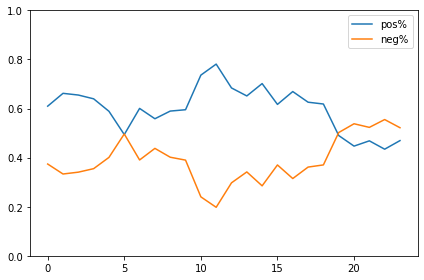

In [ ]:
plt.plot(pos_ratio,label='pos%')
plt.plot(neg_ratio,label='neg%')
plt.legend(loc='best')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

## sentiment

text

In [ ]:
sia = SentimentIntensityAnalyzer()
df["sentiment_score"] = df["text"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["sentiment"] = np.select([df["sentiment_score"] < 0, df["sentiment_score"] == 0, df["sentiment_score"] > 0],
                           ['neg', 'neu', 'pos'])

In [ ]:
df['sentiment'].value_counts()

pos    11449
neg     9728
neu      240
Name: sentiment, dtype: int64

title

In [ ]:
# sia = SentimentIntensityAnalyzer()
# df["title_sentiment_score"] = df["title"].apply(lambda x: sia.polarity_scores(x)["compound"])
# df["title_sentiment"] = np.select([df["title_sentiment_score"] < 0, df["title_sentiment_score"] == 0, df["title_sentiment_score"] > 0],
#                            ['neg', 'neu', 'pos'])

In [ ]:
# df['title_sentiment'].value_counts()

In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy_score(df['sentiment'], df['title_sentiment'])

In [96]:
# df.to_csv('/content/drive/MyDrive/BI/data/news.csv',index=False)

## token

token

In [ ]:
# text = df['text'][0]          #example
# tokenized_word=word_tokenize(text)
# print(tokenized_word)

In [ ]:
tokens=[]

In [ ]:
for i in tqdm(df['text']):
  token = word_tokenize(i)
  tokens.append(token)

100%|██████████| 21417/21417 [01:04<00:00, 333.16it/s]


stopword

In [ ]:
stop_words=set(stopwords.words("english"))
stop_words = set.union(stop_words,{'(',')',':','-','\'','"','’',"’",'“','”'})

In [ ]:
print(stop_words)

{"you'll", 'at', 'further', 'by', 'mustn', 'how', 'both', 'don', 'and', 'where', 'off', "isn't", 'than', 'a', "aren't", 'our', 'my', 'd', 'their', 'but', 'do', 'couldn', 'isn', 'he', 'been', 'over', 'again', 'ma', 'its', 'from', 'very', 'to', 'just', 'as', 'of', "should've", 'when', 'some', "wasn't", 'that', 'whom', 'you', 'no', 'between', 'theirs', 'now', "don't", "it's", 'having', 'll', 'in', ')', 'any', "couldn't", 'through', 'have', 'or', 'into', 'with', 'haven', 'what', "that'll", 'are', 'weren', "wouldn't", 'if', 'i', 'yourself', 'being', 'above', 'am', 'the', 'ourselves', 'this', 'an', 'm', "hadn't", '-', 'more', ':', "won't", 'these', 'after', 'hasn', 'who', 'there', 'own', 'should', 'ain', 'doing', 'won', 'until', 'then', 'ours', "haven't", 'can', "hasn't", "'", 'shouldn', 'before', 'few', 'out', '"', 'his', "you've", 'hers', 'will', "didn't", '(', 'me', 'against', 'here', 'once', 'themselves', 't', 'not', 'did', 'so', "weren't", 'needn', 'about', "mightn't", 'each', 'wasn', '

In [ ]:
# filtered_sent=[]                      #example
# for w in tokenized_word:
#     if w not in stop_words:
#         filtered_sent.append(w)
# print("Tokenized Sentence:",tokenized_word)
# print("Filterd Sentence:",filtered_sent)

In [ ]:
filter_stopword=[]

In [ ]:
for n in tqdm(range(21417)):
  filter=[]
  for w in tokens[n]:
    if w not in stop_words:
      filter.append(w)
  filter_stopword.append(filter)

100%|██████████| 21417/21417 [00:02<00:00, 8209.93it/s]


stem

In [ ]:
# ps = PorterStemmer()                    #example
# stemmed_words=[]
# for w in filtered_sent:
#     stemmed_words.append(ps.stem(w))
# print("Filtered Sentence:",filtered_sent)
# print("Stemmedd Sentence:",stemmed_words)

In [ ]:
after_stem=[]

In [ ]:
ps = PorterStemmer()
for n in tqdm(range(21417)):
  stem=[]
  for w in filter_stopword[n]:
    stem.append(ps.stem(w))
  after_stem.append(stem)

100%|██████████| 21417/21417 [02:46<00:00, 128.56it/s]


In [ ]:
# list1 = ['a','b','c']
# str1 = '/'.join(e for e in list1)
# str1.split('/')

save

In [ ]:
final=[]

In [ ]:
for n in tqdm(range(21417)):
  sort = '/'.join(i for i in after_stem[n])
  final.append(sort)

100%|██████████| 21417/21417 [00:00<00:00, 34833.79it/s]


In [ ]:
df['token'] = final

In [154]:
# df.to_csv('/content/drive/MyDrive/BI/data/news.csv',index=False)

## topic

LDA

In [99]:
df=df.drop([8970])

In [137]:
token = []
for i in tqdm(df['token']):
  if True:
    j = i.split('/')
    token.append(j)

100%|██████████| 21416/21416 [00:01<00:00, 20589.05it/s]


In [138]:
dictionary_LDA = corpora.Dictionary(token)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in token]

In [139]:
num_topics = 10
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                      id2word=dictionary_LDA, \
                      passes=4, alpha=[0.01]*num_topics, \
                      eta=[0.01]*len(dictionary_LDA.keys()))

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


CPU times: user 1min 39s, sys: 1.24 s, total: 1min 40s
Wall time: 1min 41s


In [151]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
  print(str(i)+": "+ topic)
  print()

0: 0.021*"island" + 0.021*"hurrican" + 0.017*"irma" + 0.016*"storm" + 0.015*"florida" + 0.013*"venezuela" + 0.010*"maduro" + 0.010*"puerto" + 0.010*"cuba" + 0.010*"power" + 0.009*"rico" + 0.008*"damag" + 0.008*"peopl" + 0.008*"govern" + 0.008*"[" + 0.008*"]" + 0.007*"colombia" + 0.006*"caribbean" + 0.006*"wind" + 0.006*"coast"

1: 0.027*"north" + 0.024*"korea" + 0.021*"china" + 0.014*"nuclear" + 0.013*"unit" + 0.010*"trump" + 0.009*"south" + 0.009*"missil" + 0.009*"korean" + 0.008*"sanction" + 0.007*"trade" + 0.007*"chines" + 0.007*"countri" + 0.006*"test" + 0.006*"offici" + 0.006*"japan" + 0.006*"beij" + 0.006*"foreign" + 0.005*"militari" + 0.005*"told"

2: 0.035*"trump" + 0.031*"’" + 0.021*"“" + 0.021*"”" + 0.012*"russia" + 0.012*"russian" + 0.009*"report" + 0.009*"washington" + 0.008*"hous" + 0.008*"campaign" + 0.008*"offici" + 0.007*"former" + 0.007*"moscow" + 0.007*"white" + 0.006*"putin" + 0.006*"investig" + 0.006*"donald" + 0.006*"committe" + 0.006*"elect" + 0.005*"new"

3: 0.02

topic score

In [141]:
topic=[]

In [142]:
for n in tqdm(range(21416)):
  TS = lda_model.get_document_topics(dictionary_LDA.doc2bow(token[n]))
  TS.sort(key=lambda TS: TS[1])
  topic.append(TS[-1])

100%|██████████| 21416/21416 [00:25<00:00, 841.25it/s]


In [ ]:
# print(topic)

topic name

In [153]:
df['topic_name'].value_counts()

6    5935
2    3040
4    2520
7    2273
1    1936
5    1871
9    1486
8    1012
3     968
0     375
Name: topic_name, dtype: int64

In [143]:
topic_name = []

In [144]:
for i in topic:
  topic_name.append(i[0])

In [145]:
topic_score = []

In [146]:
for i in topic:
  topic_score.append(i[1])

In [ ]:
df['topic_name'].value_counts()

In [149]:
df['topic_name'] = topic_name
df['topic_score'] = topic_score

In [ ]:
# df

In [ ]:
df['topic_name'].value_counts()

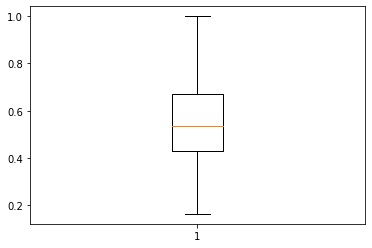

In [113]:
plt.boxplot(df['topic_score'])
plt.show()

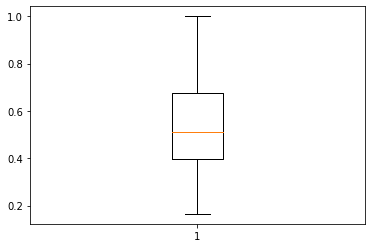

In [124]:
plt.boxplot(df['topic_score'])
plt.show()

In [61]:
stopic_score=sorted(topic_score)

In [62]:
len(stopic_score)

21416

In [69]:
(stopic_score[10708]+stopic_score[10707])/2

0.5339279

In [ ]:
# stopic_score[5354]
# stopic_score[16062]

In [78]:
(0.6748889-0.42585695)*1.5

0.373547925

In [79]:
0.5339279-0.373547925

0.160379975

### term-document matrix

In [ ]:
dft = df.T

In [ ]:
df.loc[[0]]

,title,text,subject,date,sentiment_score,sentiment,token
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0.9847,pos,washington/reuter/the/head/conserv/republican/...


In [ ]:
sents = dft.loc[['token']]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
doc_vec = vectorizer.fit_transform(sents.iloc[0])
 
# Create dataFrame
df2 = pd.DataFrame(doc_vec.toarray().transpose(),
                   index=vectorizer.get_feature_names())
 
# Change column headers
df2.columns = sents.columns
print(df2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
     'This is the first document.',
     'This document is the second document.',
    'and this is the third one.',
     'Is this the first document?',
     'Is/this/the/first/document?' ]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [ ]:
doc_vec = vectorizer.fit_transform(corpus)
 
# Create dataFrame
df2 = pd.DataFrame(doc_vec.toarray().transpose(),
                   index=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
